# Minst 手写数字识别

## 多层神经网络建模

In [1]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_core.examples.tutorials.mnist.input_data as input_data

In [2]:
# 获取 Mints手写数字数据集
mnist = input_data.read_data_sets("Data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting Data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting Data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting Data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting Data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## 构建输入层

In [3]:
# 定义标签数据占位符
x = tf.placeholder(tf.float32, [None, 784], name="X")
y = tf.placeholder(tf.float32, [None, 10], name="Y")

## 构建隐藏层（多层神经元）

In [4]:
# 隐藏层个数（决定神经网络为几层）
# 第1层神经元个数为256个
H1_NN = 256

# 第2层神经元个数为64个
H2_NN = 64

In [5]:
# 输入层 -> 第1隐藏层 -> 第2隐藏层 -> 输出层
# 输入层 -> 第1层隐藏层参数和偏置项
W1 = tf.Variable(tf.truncated_normal([784, H1_NN]))
b1 = tf.Variable(tf.zeros([H1_NN]))

# 第1隐藏层 -> 第2隐藏层参数和偏置项
W2 = tf.Variable(tf.truncated_normal([H1_NN, H2_NN]))
b2 = tf.Variable(tf.zeros([H2_NN]))

# 第2层隐藏层 -> 输出层参数和偏置项
W3 = tf.Variable(tf.truncated_normal([H2_NN, 10]))
b3 = tf.Variable(tf.zeros([10]))

## 构建输出层

In [6]:
# 计算第1层隐藏层结果
Y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

# 计算第2层隐藏层结果
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)

# 计算输出结果
forward = tf.matmul(Y2, W3) + b3
pred = tf.nn.softmax(forward)

## 定义损失函数

In [7]:
# 交叉熵
# 采用TF封装好的结合了Softmax的交叉熵函数
# 此处无需人工进行分类，直接传入前向计算结果即可，函数将自动进行Softmax分类
# 此函数将会避免由于人工计算中出现log(0)值导致最终结果为NaN的数据不稳问题
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=forward, labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## 设置训练参数

In [8]:
train_epochs = 40
batch_size = 50
total_batch = int(mnist.train.num_examples / batch_size)
display_step = 1
learning_rate = 0.01

## 选择优化器

In [9]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

## 定义准确率

In [10]:
# 对比预测值与正确值
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## 模型训练

In [11]:
startTime = time()

session = tf.Session()
session.run(tf.global_variables_initializer())

for epoch in range(train_epochs):
    for batch in range(total_batch):
        # 读取批次数据
        xs, ys = mnist.train.next_batch(batch_size)

        # 执行批次训练
        session.run(optimizer, feed_dict={x: xs, y: ys})

    # total_batch个批次使用验证数据计算误差与准确率
    loss, acc = session.run([loss_function, accuracy],
                            feed_dict={x: mnist.validation.images, y: mnist.validation.labels})

    if (epoch + 1) % display_step == 0:
        print("Train epoch: ", "%02d" % (epoch + 1),
              "Loss = ", "{:.9f}".format(loss),
              "Accuracy = ", "{:.4f}".format(acc))

duration = time() - startTime
print("Total Finished Time: ", "{:.2f}".format(duration))

Train epoch:  01 Loss =  1.056666493 Accuracy =  0.7356
Train epoch:  02 Loss =  0.828039050 Accuracy =  0.8214
Train epoch:  03 Loss =  0.543419302 Accuracy =  0.8644
Train epoch:  04 Loss =  0.516674042 Accuracy =  0.8736
Train epoch:  05 Loss =  0.368333191 Accuracy =  0.9230
Train epoch:  06 Loss =  0.346577048 Accuracy =  0.9260
Train epoch:  07 Loss =  0.282108873 Accuracy =  0.9372
Train epoch:  08 Loss =  0.276877612 Accuracy =  0.9458
Train epoch:  09 Loss =  0.339937925 Accuracy =  0.9352
Train epoch:  10 Loss =  0.201909676 Accuracy =  0.9602
Train epoch:  11 Loss =  0.284905612 Accuracy =  0.9508
Train epoch:  12 Loss =  0.238573968 Accuracy =  0.9558
Train epoch:  13 Loss =  0.212342456 Accuracy =  0.9638
Train epoch:  14 Loss =  0.259242564 Accuracy =  0.9582
Train epoch:  15 Loss =  0.318421006 Accuracy =  0.9574
Train epoch:  16 Loss =  0.238439202 Accuracy =  0.9616
Train epoch:  17 Loss =  0.257727772 Accuracy =  0.9636
Train epoch:  18 Loss =  0.240130201 Accuracy = 

## 评估模型

In [12]:
acc_test = session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

print("Train accuracy: ", acc_test)

Train accuracy:  0.9629


## 模型运用

In [13]:
# 由于pred预测解雇是one-hot编码，需要将其转换为0~9的数组
prediction_result = session.run(tf.argmax(pred, 1), feed_dict={x: mnist.test.images})

In [14]:
# 查看预测结果中的前10项
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 8, 9], dtype=int64)

In [15]:
## 找出预测错误
compare_lists = prediction_result == np.argmax(mnist.test.labels, 1)

print(compare_lists)

[ True  True  True ...  True  True  True]


In [16]:
err_list = [i for i in range(len(compare_lists)) if compare_lists[i] == False]
print("Err list length: ", len(err_list), "\n")
print(err_list)

Err list length:  371 

[8, 115, 124, 125, 151, 241, 247, 259, 282, 290, 320, 321, 337, 340, 352, 358, 406, 417, 445, 447, 448, 490, 545, 551, 552, 578, 582, 619, 655, 659, 674, 684, 691, 692, 720, 810, 829, 846, 882, 900, 947, 950, 951, 956, 965, 982, 1014, 1039, 1044, 1107, 1112, 1114, 1119, 1156, 1166, 1181, 1182, 1191, 1206, 1226, 1232, 1242, 1247, 1260, 1289, 1299, 1319, 1326, 1328, 1378, 1393, 1395, 1444, 1458, 1494, 1500, 1522, 1525, 1527, 1549, 1553, 1554, 1559, 1569, 1609, 1641, 1681, 1754, 1790, 1800, 1828, 1878, 1901, 1941, 1955, 2004, 2016, 2018, 2024, 2028, 2035, 2070, 2073, 2109, 2125, 2129, 2130, 2135, 2162, 2182, 2185, 2186, 2224, 2266, 2272, 2293, 2325, 2369, 2387, 2408, 2454, 2462, 2515, 2573, 2574, 2578, 2582, 2597, 2607, 2648, 2654, 2713, 2720, 2730, 2743, 2758, 2760, 2769, 2810, 2915, 2921, 2927, 2953, 2970, 2976, 2979, 2995, 3030, 3073, 3114, 3117, 3183, 3225, 3336, 3342, 3422, 3441, 3451, 3503, 3520, 3549, 3558, 3574, 3580, 3597, 3604, 3674, 3702, 3751, 3767, 378

## 定义一个输出错误分类函数

In [17]:
def print_predict_errs(labels, prediction):
    count = 0

    compare_lists = (prediction == np.argmax(labels, 1))
    err_list = [i for i in range(len(compare_lists)) if compare_lists[i] == False]

    for x in err_list:
        print("index: " + str(x) + " 标签值 = ", np.argmax(labels[x]), "预测值 = ", prediction[x])

        count = count + 1

    print("总计: ", count)

In [18]:
print_predict_errs(labels=mnist.test.images, prediction=prediction_result)

index: 0 标签值 =  355 预测值 =  7
index: 1 标签值 =  97 预测值 =  2
index: 2 标签值 =  406 预测值 =  1
index: 3 标签值 =  262 预测值 =  0
index: 4 标签值 =  299 预测值 =  4
index: 5 标签值 =  157 预测值 =  1
index: 6 标签值 =  287 预测值 =  4
index: 7 标签值 =  324 预测值 =  9
index: 8 标签值 =  425 预测值 =  8
index: 9 标签值 =  357 预测值 =  9
index: 10 标签值 =  216 预测值 =  0
index: 11 标签值 =  325 预测值 =  6
index: 12 标签值 =  211 预测值 =  9
index: 13 标签值 =  155 预测值 =  0
index: 14 标签值 =  126 预测值 =  1
index: 15 标签值 =  624 预测值 =  5
index: 16 标签值 =  182 预测值 =  9
index: 17 标签值 =  685 预测值 =  7
index: 18 标签值 =  257 预测值 =  3
index: 19 标签值 =  632 预测值 =  4
index: 20 标签值 =  601 预测值 =  9
index: 21 标签值 =  374 预测值 =  6
index: 22 标签值 =  94 预测值 =  6
index: 23 标签值 =  161 预测值 =  5
index: 24 标签值 =  399 预测值 =  4
index: 25 标签值 =  481 预测值 =  0
index: 26 标签值 =  298 预测值 =  7
index: 27 标签值 =  604 预测值 =  4
index: 28 标签值 =  150 预测值 =  0
index: 29 标签值 =  406 预测值 =  1
index: 30 标签值 =  232 预测值 =  3
index: 31 标签值 =  603 预测值 =  1
index: 32 标签值 =  149 预测值 =  3
index: 33 标签值 =  490 预

## 模型可视化

In [19]:
# 定义可视化函数
def plot_images_labels_prediction(
        images,  # 图像列表
        labels,  # 标签列表
        prediction,  # 预测值列表（若传入空表则为展示数据集中image与对应标签）
        index,  # 从第index个开始显示
        num=10,  # 缺省一次显示10幅
):
    # 获取当前图表
    flg = plt.gcf()

    # 1英寸等于2.54cm
    flg.set_size_inches(10, 12)

    # 最多展示25个要处理的子图
    if num > 25:
        num = 25

    for i in range(0, num):
        # 获取当前要处理的子图
        ax = plt.subplot(5, 5, i + 1)

        # 显示第index个图像
        ax.imshow(np.reshape(images[index], (28, 28), ), cmap="binary")

        # 构建该图上要显示的title信息
        title = "Label = " + str(np.argmax(labels[index]))

        if len(prediction) > 0:
            title += ", Pred = " + str(prediction[index])

        ax.set_title(title, fontsize=10)

        index += 1

    plt.show()

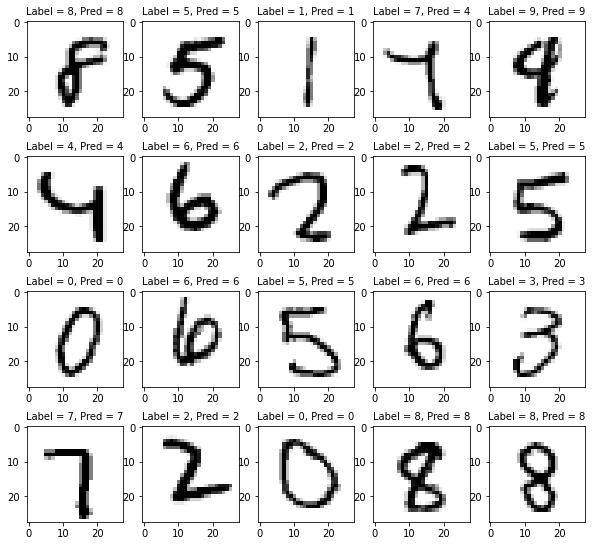

In [20]:
plot_images_labels_prediction(
    mnist.test.images,
    mnist.test.labels,
    prediction_result,
    355,
    20
)